In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ghibtools as gh
from compute_global_dataframes import relaxation_concat_job, hrv_concat_job, resp_features_concat_job, rsa_concat_job, bmrq_concat_job
from configuration import *
from params import *

# SAVE PARAMS

In [3]:
save_folder = base_folder / 'Figures' / 'tempo_music'

# MUSIC SCORING

In [4]:
concat = []
for participant in subject_keys:
    ses01_folder = base_folder / 'Raw_Data' / f'{participant}' / 'questionnaires' / 'ses01'
    df_participant = pd.read_excel(ses01_folder /  f'cotations_musiques_relatives_{participant}_bis.xlsx', index_col = 0)
    concat.append(df_participant)
cotations_relatives_musiques = pd.concat(concat)

In [5]:
cotations_relatives_musiques['tempo'] = cotations_relatives_musiques['musique_num'].map(tempos)
cotations_relatives_musiques['music_name'] = cotations_relatives_musiques['musique_num'].map(music_mapper)

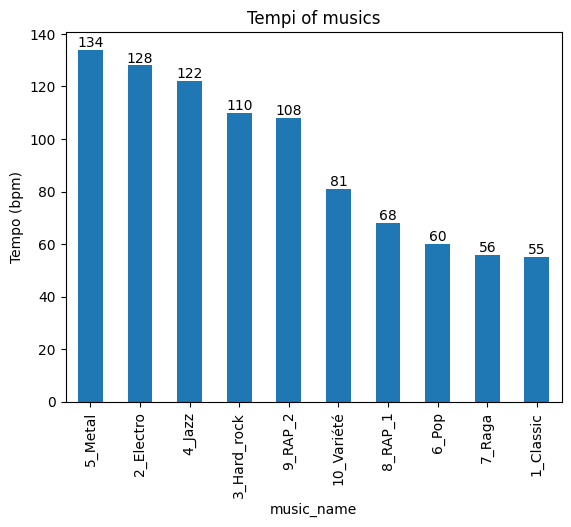

In [6]:
fig, ax = plt.subplots()
cotations_relatives_musiques.groupby('music_name')['tempo'].mean().sort_values(ascending = False).plot.bar(ax=ax)
ax.set_ylabel('Tempo (bpm)')
for bar in ax.containers:
    ax.bar_label(bar)
ax.set_title('Tempi of musics')
fig.savefig(save_folder / 'tempi_of_musics.png', dpi = 500, bbox_inches = 'tight')

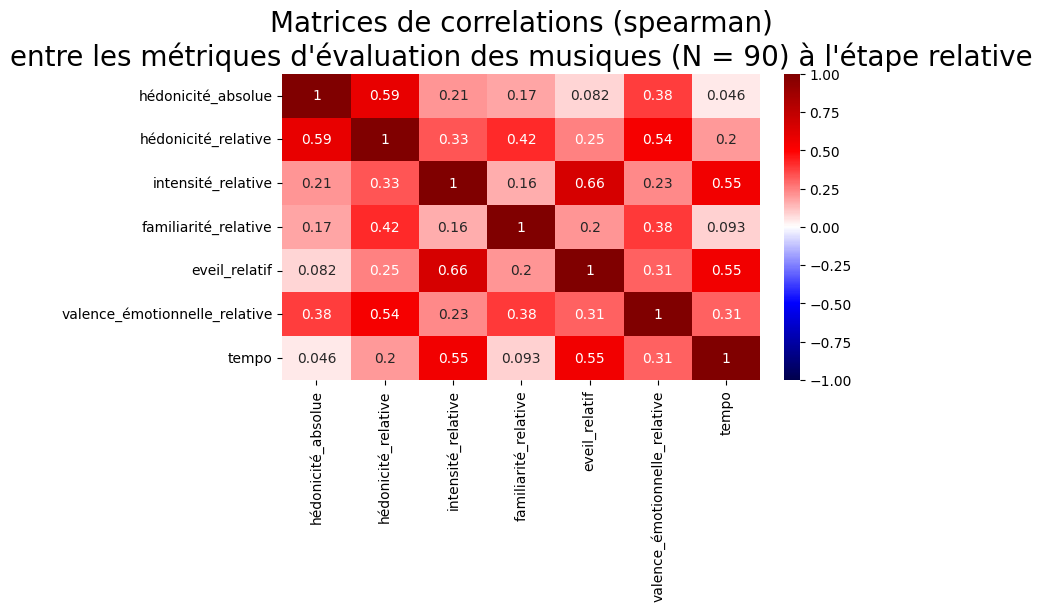

In [7]:
metrics = ['hédonicité_absolue','hédonicité_relative','intensité_relative','familiarité_relative','eveil_relatif','valence_émotionnelle_relative','tempo']
corr_method = 'spearman'
N = cotations_relatives_musiques.shape[0]
fig, ax = plt.subplots(figsize = (8,6), constrained_layout = True)
ax.set_title(f"Matrices de correlations ({corr_method})\nentre les métriques d'évaluation des musiques (N = {N}) à l'étape relative", fontsize = 20)


sns.heatmap(cotations_relatives_musiques.loc[:,metrics].corr(corr_method,numeric_only = True), cmap = 'seismic', vmin = -1, vmax =1, annot = True, ax=ax)


fig.savefig(save_folder / 'correlations_tempo_evaluation_relative.png', dpi = 500, bbox_inches = 'tight')

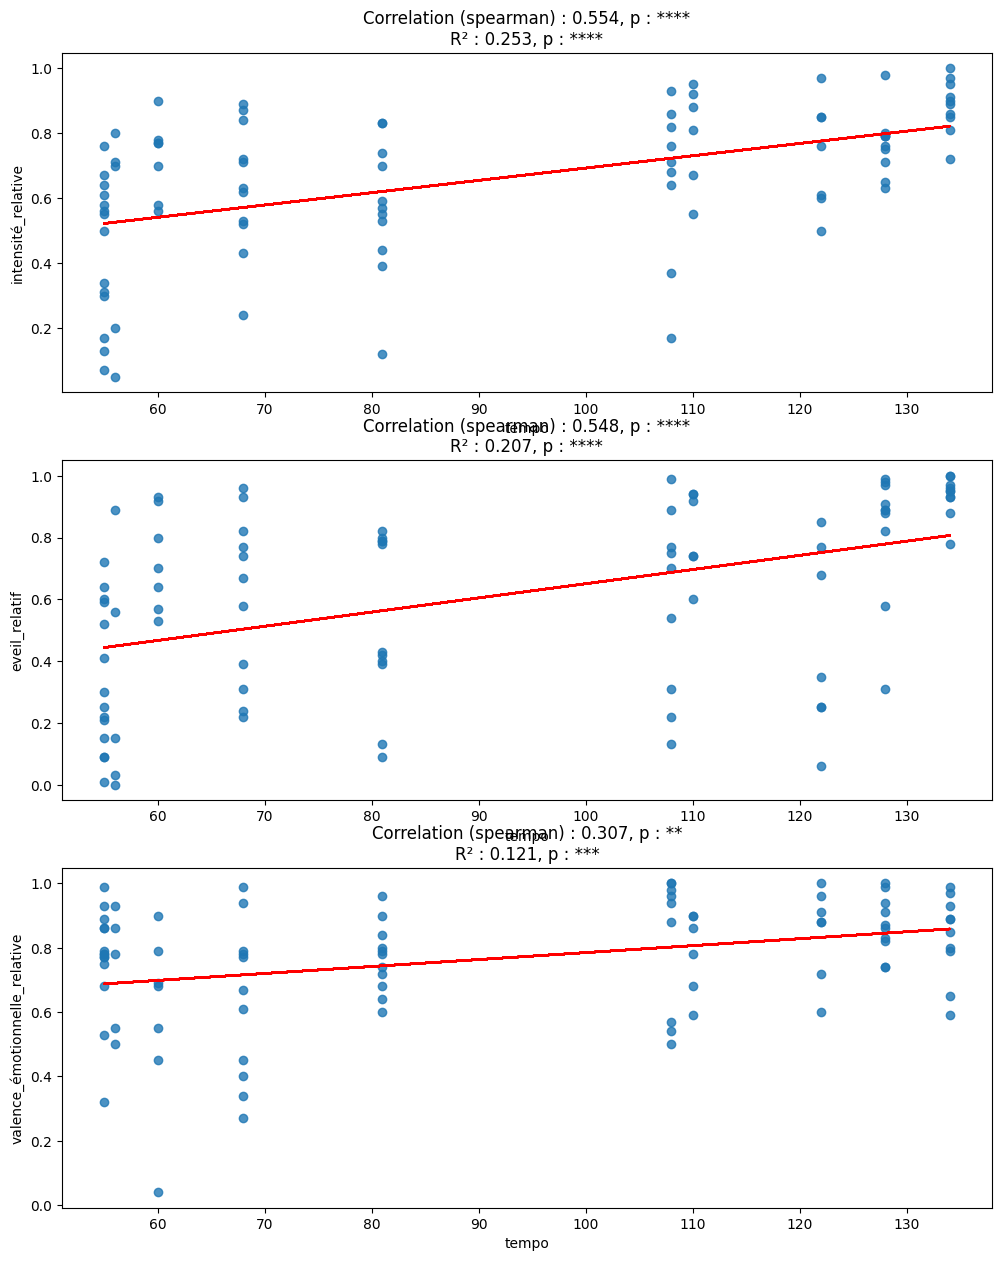

In [8]:
fig, axs = plt.subplots(nrows = 3, figsize = (12,15))
ax = axs[0]
gh.stats_quantitative(df = cotations_relatives_musiques, xlabel = 'tempo', ylabel = 'intensité_relative', ax=ax)
ax = axs[1]
gh.stats_quantitative(df = cotations_relatives_musiques, xlabel = 'tempo', ylabel = 'eveil_relatif', ax=ax)
ax = axs[2]
gh.stats_quantitative(df = cotations_relatives_musiques, xlabel = 'tempo', ylabel = 'valence_émotionnelle_relative', ax=ax)

fig.savefig(save_folder / 'stats_quantitative_evaluations_relatives_tempo.png', dpi = 500, bbox_inches = 'tight')

In [9]:
music_features = pd.DataFrame({'participant':chosen_musics.keys(),'chosen_music':chosen_musics.values()})
music_features['tempo'] = music_features['chosen_music'].map(tempos)
music_features

,participant,chosen_music,tempo
0,P01,10,81
1,P02,10,81
2,P03,10,81
3,P04,3,110
4,P05,9,108
5,P06,4,122
6,P07,7,56
7,P08,10,81
8,P09,9,108
9,P10,9,108


In [10]:
(music_features['tempo'] < 100).value_counts()

tempo
True     17
False    13
Name: count, dtype: int64

In [11]:
music_features.set_index('chosen_music')['tempo'] < 100

chosen_music
10     True
10     True
10     True
3     False
9     False
4     False
7      True
10     True
9     False
9     False
10     True
10     True
9     False
7      True
8      True
10     True
10     True
8      True
10     True
5     False
10     True
8      True
6      True
5     False
9     False
9     False
9     False
9     False
5     False
10     True
Name: tempo, dtype: bool

In [12]:
music_features['speed'] = np.nan
music_features['speed'] = music_features['tempo'] < 100
music_features['speed'] = music_features['speed'].map({True:'slow',False:'fast'})
music_features

,participant,chosen_music,tempo,speed
0,P01,10,81,slow
1,P02,10,81,slow
2,P03,10,81,slow
3,P04,3,110,fast
4,P05,9,108,fast
5,P06,4,122,fast
6,P07,7,56,slow
7,P08,10,81,slow
8,P09,9,108,fast
9,P10,9,108,fast


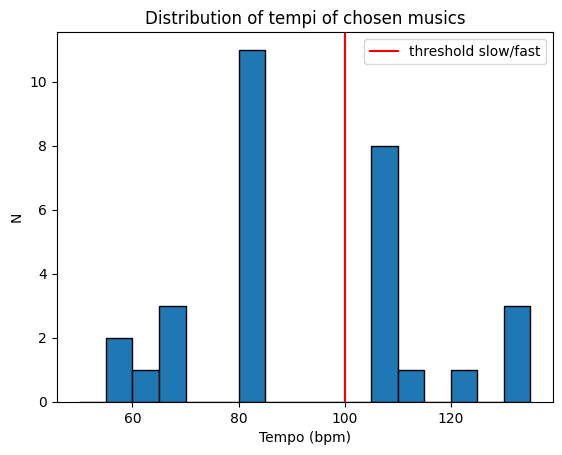

In [13]:
fig, ax = plt.subplots()
bins = np.arange(50, 140, 5)
tempi = music_features['tempo'].values
ax.hist(tempi, bins=bins, edgecolor = 'k')
ax.set_xlabel('Tempo (bpm)')
ax.set_ylabel('N')
ax.set_title('Distribution of tempi of chosen musics')
ax.axvline(100, label = 'threshold slow/fast', color = 'r')
ax.legend()
fig.savefig(save_folder / 'distribution_tempi_chosen_musics.png', dpi = 500, bbox_inches = 'tight')

In [14]:
bmrq = bmrq_concat_job.get(global_key).to_dataframe()

In [15]:
music_features['BMRQ'] = music_features['participant'].map(bmrq[['participant','BMRQ']].set_index('participant').to_dict()['BMRQ'])

<Axes: title={'center': 'Correlation (spearman) : 0.218, p : ns\nR² : 0.021, p : ns'}, xlabel='BMRQ', ylabel='tempo'>

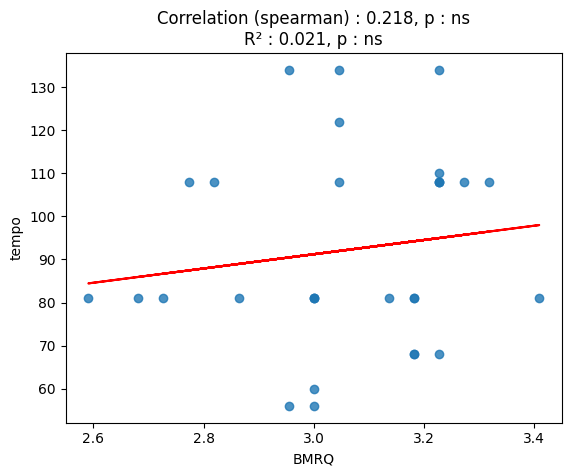

In [16]:
gh.stats_quantitative(df = music_features, xlabel = 'BMRQ', ylabel = 'tempo')

# TEMPO ON RESPI

In [17]:
resp = resp_features_concat_job.get(global_key).to_dataframe().groupby(['participant','session']).median(True).reset_index()
resp = resp.query("session == 'music'")
resp['tempo'] = resp['participant'].map(music_features[['participant','tempo']].set_index('participant').to_dict()['tempo'])
resp['speed'] = resp['participant'].map(music_features[['participant','speed']].set_index('participant').to_dict()['speed'])
resp.head(5)

,participant,session,inspi_index,expi_index,next_inspi_index,inspi_time,expi_time,next_inspi_time,cycle_duration,inspi_duration,...,expi_amplitude,total_volume,artifact,stai_state,stai_trait,Maia_Mean,OAS,BMRQ,tempo,speed
1,P01,music,300864.0,301826.5,303446.0,300.8640,301.8265,303.4460,2.8435,0.9650,...,31.742696,69.078041,0.0,40.0,61.0,1.019643,2.666667,2.727273,81,slow
4,P02,music,279438.0,280774.0,282702.5,279.4380,280.7740,282.7025,3.6515,1.4575,...,108.345036,218.460358,0.0,24.0,37.0,3.354762,3.066667,3.000000,81,slow
7,P03,music,333286.0,334605.0,336552.0,333.2860,334.6050,336.5520,3.4750,1.2390,...,250.399121,284.263225,0.0,20.0,24.0,3.664583,3.266667,3.136364,81,slow
10,P04,music,298824.5,299891.0,301914.0,298.8245,299.8910,301.9140,2.9295,1.0330,...,187.384160,263.028225,0.0,27.0,33.0,3.196429,3.000000,3.227273,110,fast
13,P05,music,285961.0,287834.0,290457.0,285.9610,287.8340,290.4570,4.4720,1.5820,...,41.614774,133.770157,0.0,27.0,21.0,4.107738,3.200000,3.227273,108,fast


In [18]:
resp.columns

Index(['participant', 'session', 'inspi_index', 'expi_index',
       'next_inspi_index', 'inspi_time', 'expi_time', 'next_inspi_time',
       'cycle_duration', 'inspi_duration', 'expi_duration', 'cycle_freq',
       'cycle_ratio', 'inspi_volume', 'expi_volume', 'total_amplitude',
       'inspi_amplitude', 'expi_amplitude', 'total_volume', 'artifact',
       'stai_state', 'stai_trait', 'Maia_Mean', 'OAS', 'BMRQ', 'tempo',
       'speed'],
      dtype='object')

<Axes: >

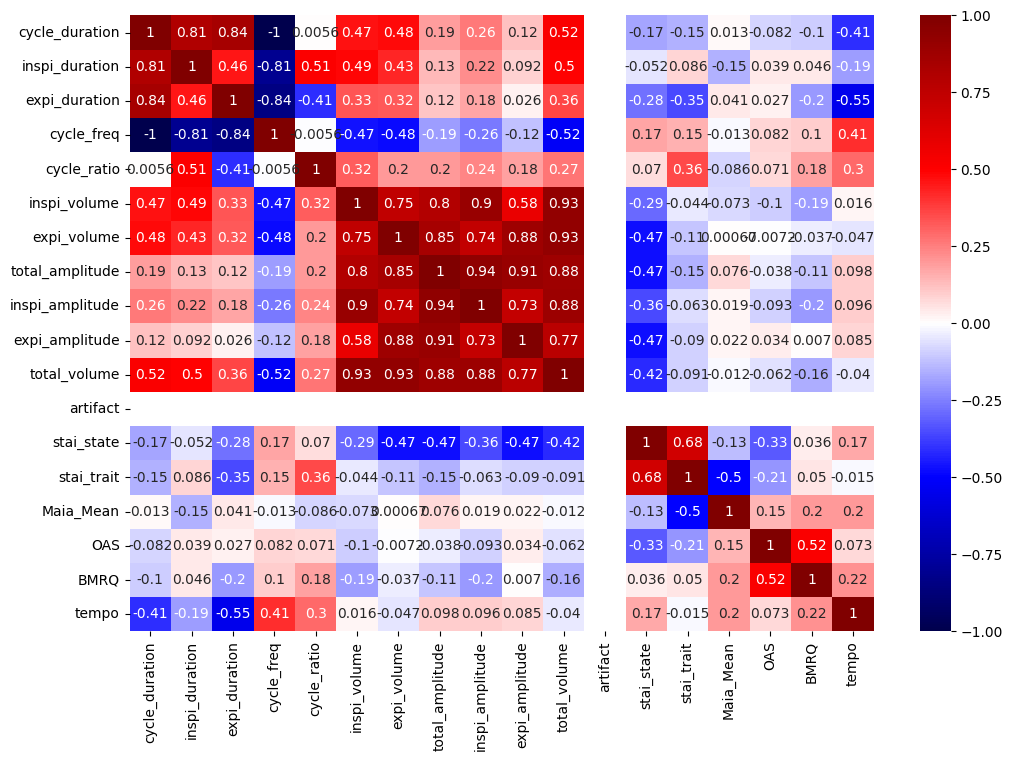

In [19]:
cols = ['cycle_duration', 'inspi_duration', 'expi_duration', 'cycle_freq',
       'cycle_ratio', 'inspi_volume', 'expi_volume', 'total_amplitude',
       'inspi_amplitude', 'expi_amplitude', 'total_volume', 'artifact',
       'stai_state', 'stai_trait', 'Maia_Mean', 'OAS', 'BMRQ', 'tempo']

fig, ax=  plt.subplots(figsize = (12,8))
sns.heatmap(resp[cols].corr(numeric_only = True, method = 'spearman'), cmap = 'seismic', annot = True, vmin = -1, vmax = 1, ax=ax)

<Axes: title={'center': 'Correlation (spearman) : 0.412, p : *\nR² : 0.179, p : *'}, xlabel='tempo', ylabel='cycle_freq'>

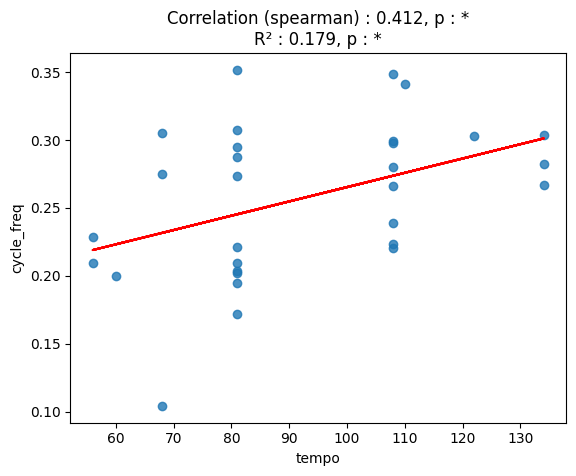

In [20]:
gh.stats_quantitative(df = resp, xlabel = 'tempo', ylabel = 'cycle_freq')

<Axes: title={'center': 'Effect of speed on cycle_duration : * \n Mann-Whitney : p = 0.045, CLES : 0.281 (S)'}, xlabel='speed', ylabel='cycle_duration'>

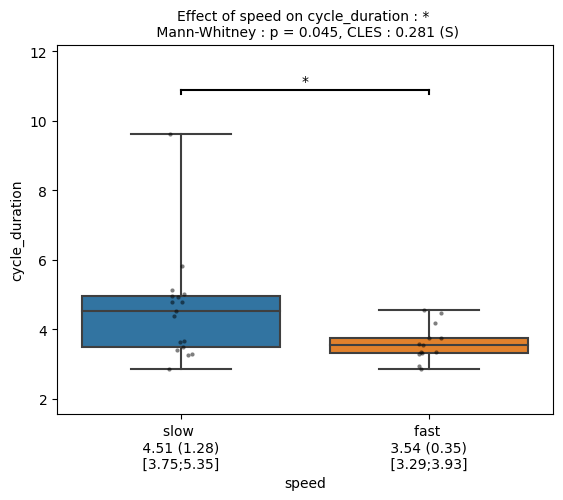

In [21]:
gh.auto_stats(df = resp, predictor = 'speed', outcome = 'cycle_duration', design = 'between')

# TEMPO ON HRV

In [22]:
hrv = hrv_concat_job.get(global_key).to_dataframe()
hrv = hrv.query("session == 'music'")
hrv['tempo'] = hrv['participant'].map(music_features[['participant','tempo']].set_index('participant').to_dict()['tempo'])
hrv['speed'] = hrv['participant'].map(music_features[['participant','speed']].set_index('participant').to_dict()['speed'])

In [23]:
hrv.columns

Index(['participant', 'session', 'HRV_Mean', 'HRV_SD', 'HRV_Median', 'HRV_Mad',
       'HRV_CV', 'HRV_MCV', 'HRV_Asymmetry', 'HRV_RMSSD', 'stai_state',
       'stai_trait', 'Gender', 'Maia_Mean', 'OAS', 'BMRQ', 'tempo', 'speed'],
      dtype='object')

<Axes: >

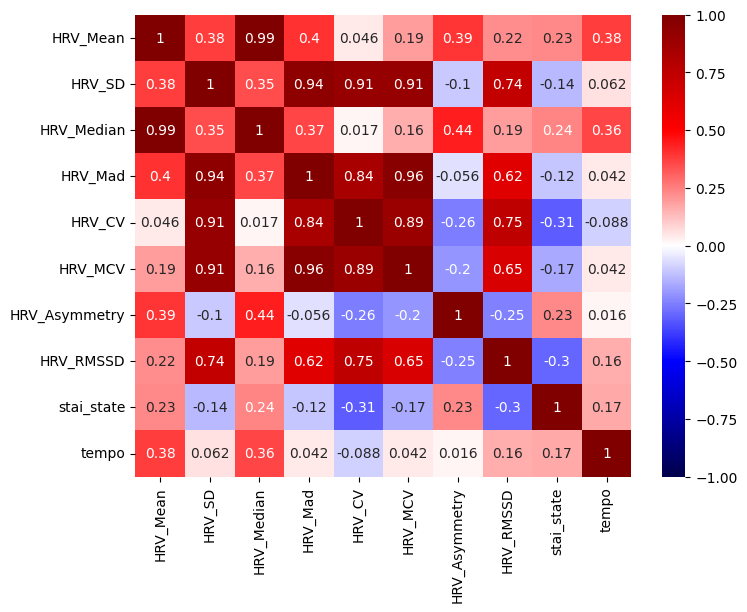

In [24]:
cols = ['HRV_Mean', 'HRV_SD', 'HRV_Median', 'HRV_Mad',
       'HRV_CV', 'HRV_MCV', 'HRV_Asymmetry', 'HRV_RMSSD', 'stai_state','tempo']

fig, ax=  plt.subplots(figsize = (8,6))
sns.heatmap(hrv[cols].corr(numeric_only = True, method = 'spearman'), cmap = 'seismic', annot = True, vmin = -1, vmax = 1, ax=ax)

<Axes: title={'center': 'Correlation (spearman) : 0.359, p : ns\nR² : 0.165, p : *'}, xlabel='tempo', ylabel='HRV_Median'>

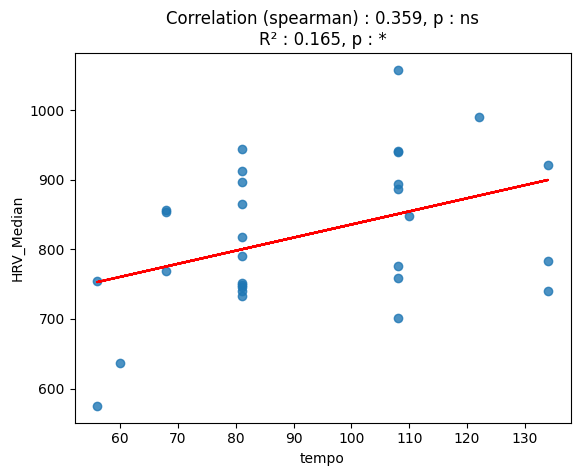

In [25]:
gh.stats_quantitative(df = hrv, xlabel = 'tempo', ylabel = 'HRV_Median')

<Axes: title={'center': 'Correlation (pearson) : 0.406, p : *\nR² : 0.165, p : *'}, xlabel='tempo', ylabel='HRV_Median'>

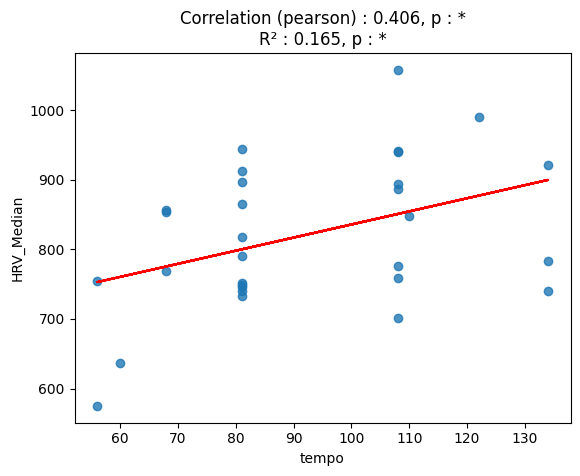

In [26]:
gh.stats_quantitative(df = hrv, xlabel = 'tempo', ylabel = 'HRV_Median', corr_method = 'pearson')

<Axes: title={'center': 'Correlation (spearman) : 0.042, p : ns\nR² : 0.001, p : ns'}, xlabel='tempo', ylabel='HRV_Mad'>

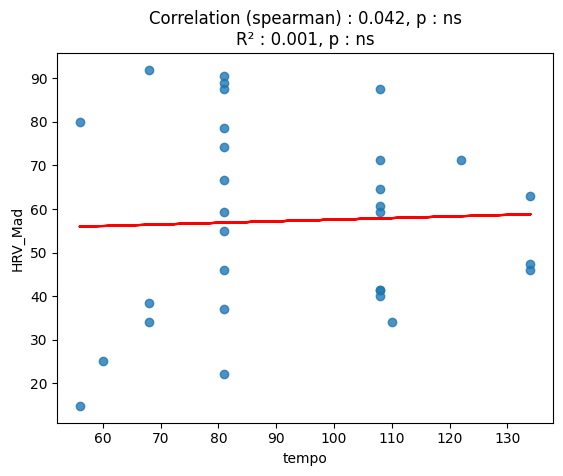

In [27]:
gh.stats_quantitative(df = hrv, xlabel = 'tempo', ylabel = 'HRV_Mad')

<Axes: title={'center': 'Correlation (spearman) : 0.042, p : ns\nR² : 0.001, p : ns'}, xlabel='tempo', ylabel='HRV_Mad'>

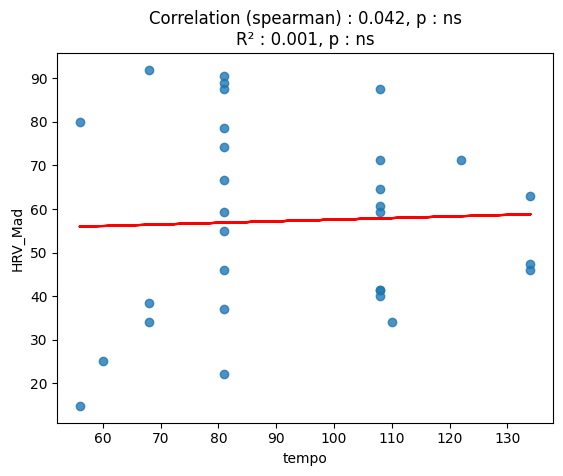

In [28]:
gh.stats_quantitative(df = hrv, xlabel = 'tempo', ylabel = 'HRV_Mad')

<Axes: title={'center': 'Effect of speed on HRV_Mad : ns \n Mann-Whitney : p = 0.802, CLES : 0.471 (S)'}, xlabel='speed', ylabel='HRV_Mad'>

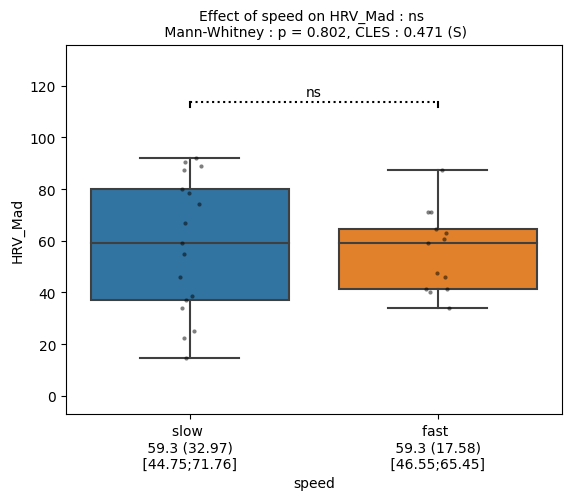

In [29]:
gh.auto_stats(df = hrv, predictor = 'speed', outcome = 'HRV_Mad', design = 'between')

<Axes: title={'center': 'Effect of speed on HRV_Median : ns \n t-test_ind : p = 0.053, cohen-d : 0.762 (M)'}, xlabel='speed', ylabel='HRV_Median'>

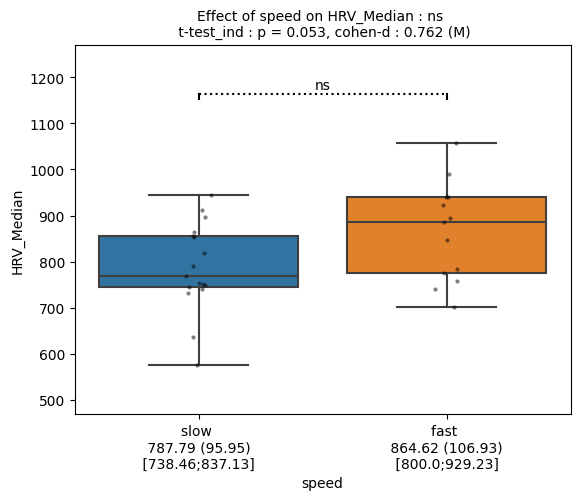

In [30]:
gh.auto_stats(df = hrv, predictor = 'speed', outcome = 'HRV_Median', design = 'between')

# TEMPO ON RSA

In [31]:
rsa = rsa_concat_job.get(global_key).to_dataframe().groupby(['participant','session']).median(True).reset_index()
rsa = rsa.query("session == 'music'")
rsa['tempo'] = rsa['participant'].map(music_features[['participant','tempo']].set_index('participant').to_dict()['tempo'])
rsa['speed'] = rsa['participant'].map(music_features[['participant','speed']].set_index('participant').to_dict()['speed'])
rsa.head(5)

,participant,session,peak_index,trough_index,peak_time,trough_time,peak_value,trough_value,rising_amplitude,decay_amplitude,...,decay_duration,rising_slope,decay_slope,stai_state,stai_trait,Maia_Mean,OAS,BMRQ,tempo,speed
1,P01,music,3016.5,3030.5,301.7140,303.1140,83.910902,80.030339,3.572436,3.586949,...,1.5,2.538447,2.514716,40.0,61.0,1.019643,2.666667,2.727273,81,slow
4,P02,music,2806.0,2822.0,280.6380,282.2380,85.950638,75.508218,9.846101,10.017317,...,2.0,5.363314,5.708185,24.0,37.0,3.354762,3.066667,3.000000,81,slow
7,P03,music,3345.0,3364.0,334.5860,336.4860,85.806562,74.936715,9.560027,9.429559,...,2.1,5.825576,4.664901,20.0,24.0,3.664583,3.266667,3.136364,81,slow
10,P04,music,3002.5,3015.0,300.2745,301.5245,73.395625,68.989958,3.830236,3.925862,...,1.7,3.269927,2.454877,27.0,33.0,3.196429,3.000000,3.227273,110,fast
13,P05,music,2872.0,2899.0,287.2610,289.9610,66.289331,60.483193,5.035702,4.860366,...,2.6,2.116911,2.327392,27.0,21.0,4.107738,3.200000,3.227273,108,fast


<Axes: title={'center': 'Correlation (spearman) : -0.132, p : ns\nR² : 0.052, p : ns'}, xlabel='tempo', ylabel='decay_amplitude'>

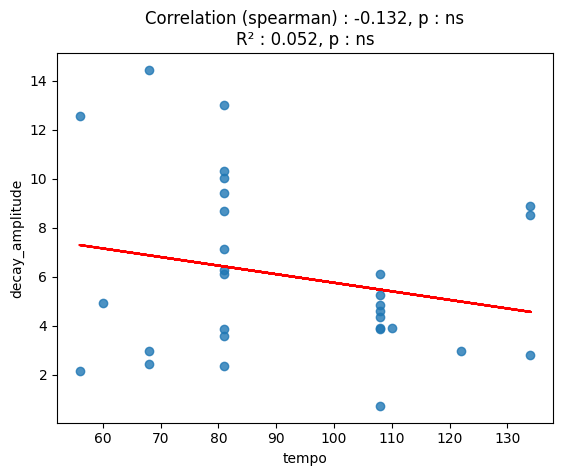

In [32]:
gh.stats_quantitative(df = rsa, xlabel = 'tempo', ylabel = 'decay_amplitude')

<Axes: title={'center': 'Effect of speed on decay_amplitude : ns \n Mann-Whitney : p = 0.18, CLES : 0.353 (S)'}, xlabel='speed', ylabel='decay_amplitude'>

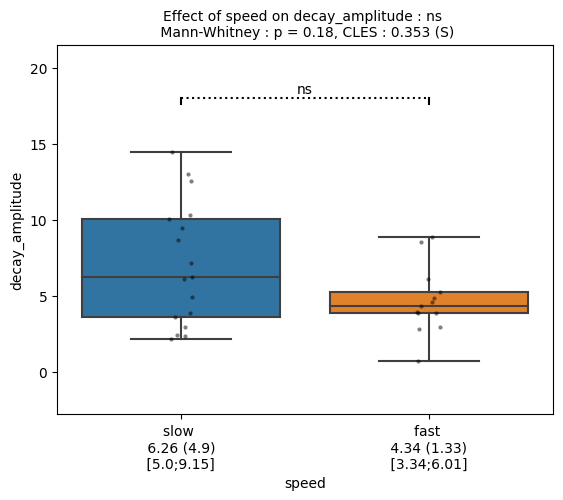

In [33]:
gh.auto_stats(df = rsa, predictor = 'speed', outcome = 'decay_amplitude', design = 'between')

# TEMPO ON PSYCHO

In [34]:
psycho = relaxation_concat_job.get(global_key).to_dataframe()
psycho = psycho.query("session == 'music'")
psycho['tempo'] = psycho['participant'].map(music_features[['participant','tempo']].set_index('participant').to_dict()['tempo'])
psycho['speed'] = psycho['participant'].map(music_features[['participant','speed']].set_index('participant').to_dict()['speed'])

In [35]:
psycho.columns

Index(['participant', 'session', 'stim_name', 'Arousal', 'Relaxation',
       'Relaxation_intensity', 'Perceived_duration', 'stai_state',
       'stai_trait', 'Gender', 'Maia_Mean', 'OAS', 'BMRQ', 'tempo', 'speed'],
      dtype='object')

<Axes: >

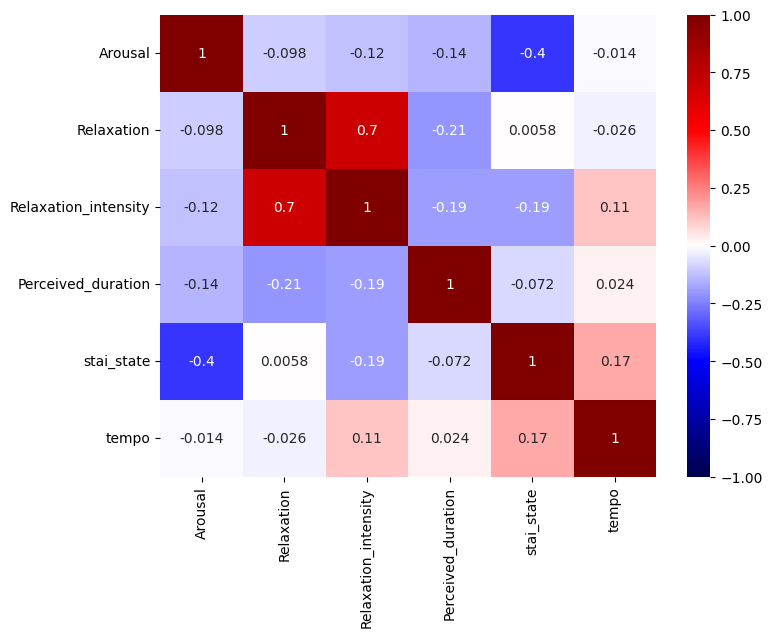

In [36]:
cols = ['Arousal', 'Relaxation',
       'Relaxation_intensity', 'Perceived_duration', 'stai_state','tempo']

fig, ax=  plt.subplots(figsize = (8,6))
sns.heatmap(psycho[cols].corr(numeric_only = True, method = 'spearman'), cmap = 'seismic', annot = True, vmin = -1, vmax = 1, ax=ax)

<Axes: title={'center': 'Correlation (spearman) : -0.014, p : ns\nR² : 0.0, p : ns'}, xlabel='tempo', ylabel='Arousal'>

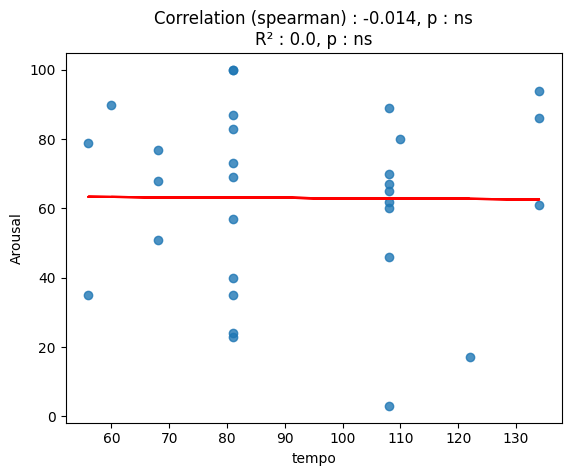

In [37]:
gh.stats_quantitative(df = psycho, xlabel = 'tempo', ylabel = 'Arousal')

<Axes: title={'center': 'Correlation (spearman) : 0.111, p : ns\nR² : 0.039, p : ns'}, xlabel='tempo', ylabel='Relaxation_intensity'>

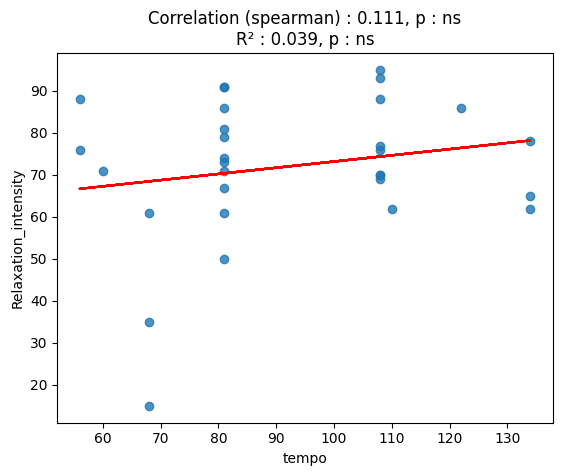

In [38]:
gh.stats_quantitative(df = psycho, xlabel = 'tempo', ylabel = 'Relaxation_intensity')

<Axes: title={'center': 'Effect of speed on Relaxation_intensity : ns \n Mann-Whitney : p = 0.489, CLES : 0.577 (M)'}, xlabel='speed', ylabel='Relaxation_intensity'>

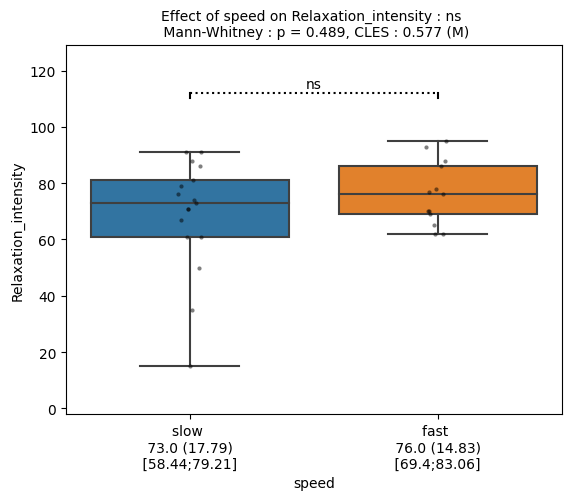

In [39]:
gh.auto_stats(df = psycho, predictor = 'speed', outcome = 'Relaxation_intensity', design = 'between')

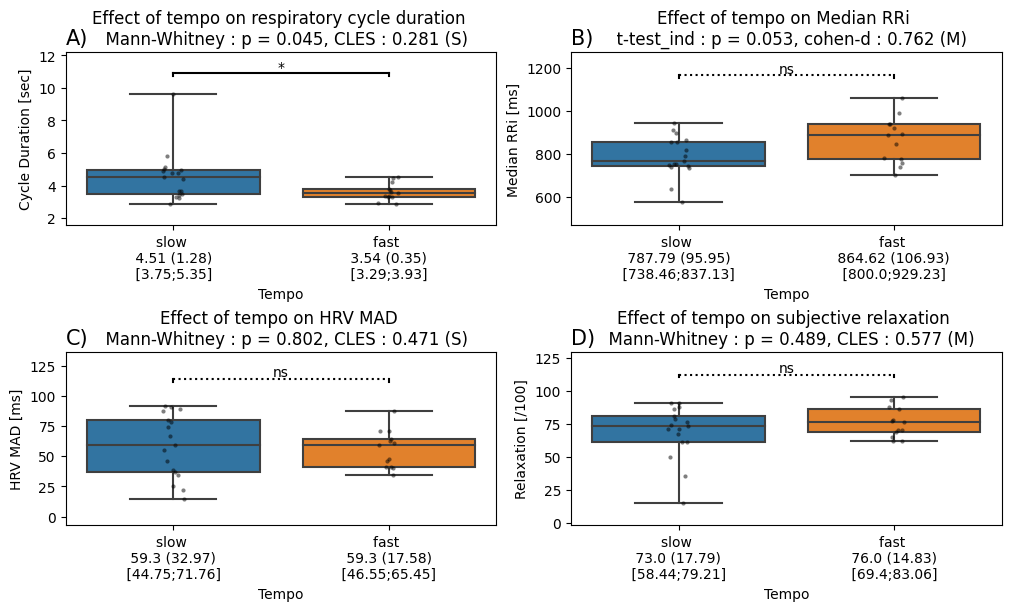

In [40]:
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (10,6), constrained_layout = True)
ax = axs[0,0]
gh.auto_stats(df = resp, predictor = 'speed', outcome = 'cycle_duration', design = 'between', ax=ax, outcome_clean_label='Cycle Duration', outcome_unit = 'sec')
ax.set_title('Effect of tempo on respiratory cycle duration \n {}'.format(ax.get_title().split('\n')[-1]))
ax = axs[0,1]
gh.auto_stats(df = hrv, predictor = 'speed', outcome = 'HRV_Median', design = 'between', ax=ax, outcome_clean_label='Median RRi', outcome_unit = 'ms')
ax.set_title('Effect of tempo on Median RRi \n {}'.format(ax.get_title().split('\n')[-1]))
ax = axs[1,0]
gh.auto_stats(df = hrv, predictor = 'speed', outcome = 'HRV_Mad', design = 'between', ax=ax, outcome_clean_label='HRV MAD', outcome_unit = 'ms')
ax.set_title('Effect of tempo on HRV MAD \n {}'.format(ax.get_title().split('\n')[-1]))
ax = axs[1,1]
gh.auto_stats(df = psycho, predictor = 'speed', outcome = 'Relaxation_intensity', design = 'between', ax=ax, outcome_clean_label='Relaxation', outcome_unit = '/100')
ax.set_title('Effect of tempo on subjective relaxation \n {}'.format(ax.get_title().split('\n')[-1]))

letters = ['A)','B)','C)','D)']
for i, ax in enumerate(axs.flatten()):
    ax.set_xlabel('Tempo')
    ax2 = ax.twinx()
    ax2.set_title(letters[i], loc = 'left', fontsize = 15)
    ax2.axis('off')

fig.savefig(save_folder / 'stats_quali_quanti_tempo_resp_hrv_psycho.png', dpi = 500, bbox_inches = 'tight')

<Axes: title={'center': 'Correlation (spearman) : 0.412, p : *\nR² : 0.179, p : *'}, xlabel='tempo', ylabel='cycle_freq'>

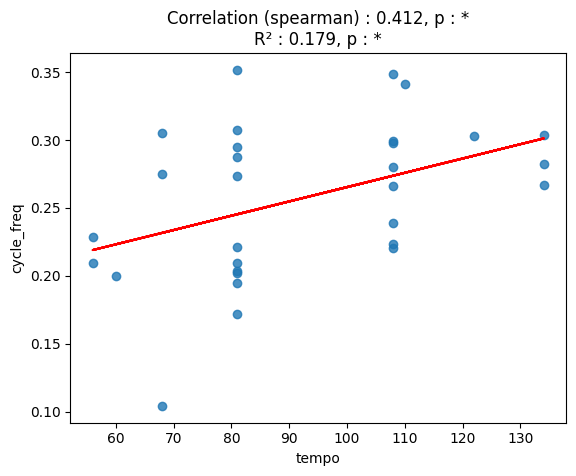

In [41]:
fig, ax = plt.subplots()
gh.stats_quantitative(df = resp, xlabel = 'tempo', ylabel = 'cycle_freq', ax=ax)

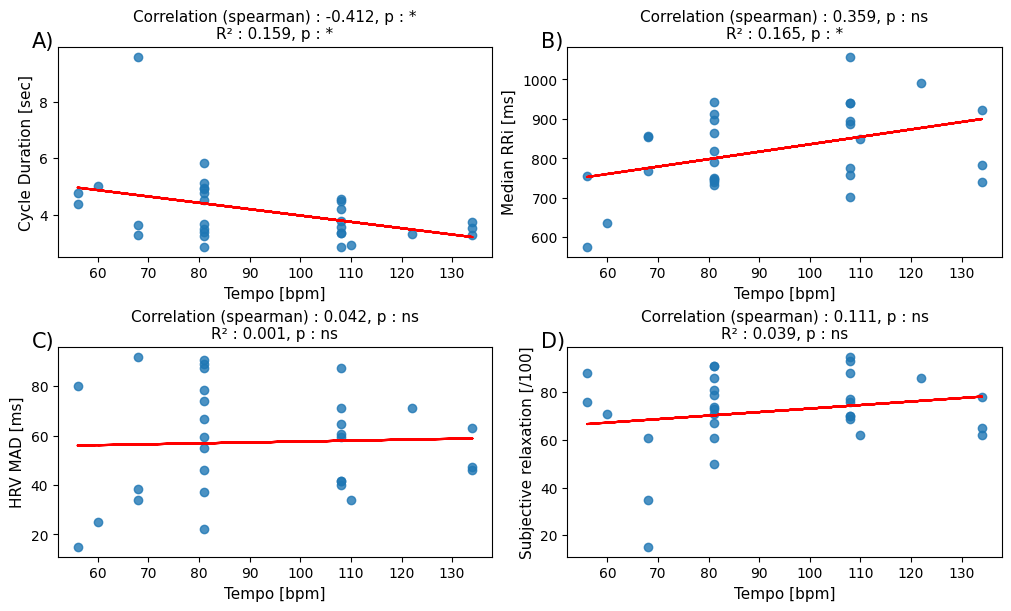

In [42]:

global_fontsize = 11
letter_fontsize = 15

letters = ['A)','B)','C)','D)']

fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (10,6), constrained_layout = True)
ax = axs[0,0]
gh.stats_quantitative(df = resp, xlabel = 'tempo', ylabel = 'cycle_duration', ax=ax)
ax.set_ylabel('Cycle Duration [sec]', fontsize = global_fontsize)
ax = axs[0,1]
gh.stats_quantitative(df = hrv, xlabel = 'tempo', ylabel = 'HRV_Median', ax=ax)
ax.set_ylabel('Median RRi [ms]', fontsize = global_fontsize)
ax = axs[1,0]
gh.stats_quantitative(df = hrv, xlabel = 'tempo', ylabel = 'HRV_Mad', ax=ax)
ax.set_ylabel('HRV MAD [ms]', fontsize = global_fontsize)
ax = axs[1,1]
gh.stats_quantitative(df = psycho, xlabel = 'tempo', ylabel = 'Relaxation_intensity', ax=ax)
ax.set_ylabel('Subjective relaxation [/100]', fontsize = global_fontsize)

for i, ax in enumerate(axs.flatten()):
    ax.set_title(ax.get_title(), fontsize = global_fontsize)
    ax.set_xlabel('Tempo [bpm]', fontsize = global_fontsize)
    ax2 = ax.twinx()
    xpos_letter = ax2.get_xlim()[0]
    ax2.text(x =  xpos_letter - xpos_letter / 10 , y = ax2.get_ylim()[1], s = letters[i], fontsize = letter_fontsize)
    ax2.axis('off')

fig.savefig(save_folder / 'stats_quanti_quanti_tempo_resp_hrv_psycho.png', dpi = 500, bbox_inches = 'tight')

# TAKE INTO ACCOUNT BASELINE LEVEL

In [56]:
keep_metrics = {'resp':['cycle_duration','total_volume'],
                'hrv':['HRV_Median','HRV_Mad'],
                'rsa':['decay_amplitude'],
                'psycho':['Relaxation_intensity','Arousal']
               }

dict_df = {'resp':resp,
           'hrv':hrv,
           'psycho':psycho,
           'rsa':rsa
          }

In [57]:
def load_formatted_data(data_type, music_features=music_features, keep_metric=keep_metrics):
    if data_type == 'resp':
        df = resp_features_concat_job.get(global_key).to_dataframe().groupby(['participant','session']).median(True).reset_index()
    elif data_type == 'hrv':
        df = hrv_concat_job.get(global_key).to_dataframe()
    elif data_type == 'rsa':
        df = rsa_concat_job.get(global_key).to_dataframe().groupby(['participant','session']).median(True).reset_index()
    elif data_type == 'psycho':
        df = relaxation_concat_job.get(global_key).to_dataframe()
    keep_cols =  ['participant','session'] + keep_metrics[data_type]
    df = df[keep_cols]
    df['tempo'] = df['participant'].map(music_features[['participant','tempo']].set_index('participant').to_dict()['tempo'])
    df['speed'] = df['participant'].map(music_features[['participant','speed']].set_index('participant').to_dict()['speed'])
    
    df_music = df[df['session'] == 'music'].reset_index(drop = True)
    df_baseline = df[df['session'] == 'baseline'].reset_index(drop = True)
    
    for col in keep_metrics[data_type]:
        df_music[f'baseline_{col}'] = df_baseline[col].values
        df_music[f'baselined_{col}'] = df_music[col].values - df_baseline[col].values
     
    return df_music

In [58]:
def load_formatted_data_2(data_type, music_features=music_features, keep_metric=keep_metrics):
    if data_type == 'resp':
        df = resp_features_concat_job.get(global_key).to_dataframe().groupby(['participant','session']).median(True).reset_index()
    elif data_type == 'hrv':
        df = hrv_concat_job.get(global_key).to_dataframe()
    elif data_type == 'rsa':
        df = rsa_concat_job.get(global_key).to_dataframe().groupby(['participant','session']).median(True).reset_index()
    elif data_type == 'psycho':
        df = relaxation_concat_job.get(global_key).to_dataframe()
    keep_cols =  ['participant','session'] + keep_metrics[data_type]
    df = df[keep_cols]
    df['tempo'] = df['participant'].map(music_features[['participant','tempo']].set_index('participant').to_dict()['tempo'])
    df['speed'] = df['participant'].map(music_features[['participant','speed']].set_index('participant').to_dict()['speed'])
    df = df[df['session'].isin(['baseline','music'])]
    return df

In [59]:
hrv_formatted = load_formatted_data('hrv')
hrv_formatted

,participant,session,HRV_Median,HRV_Mad,tempo,speed,baseline_HRV_Median,baselined_HRV_Median,baseline_HRV_Mad,baselined_HRV_Mad
0,P01,music,733.0,37.065055,81,slow,709.0,24.0,44.478067,-7.413011
1,P02,music,740.0,88.956133,81,slow,744.0,-4.0,97.851746,-8.895613
2,P03,music,746.0,59.304089,81,slow,734.5,11.5,64.493197,-5.189108
3,P04,music,848.0,34.099851,110,fast,787.0,61.0,32.617249,1.482602
4,P05,music,940.0,64.493197,108,fast,857.0,83.0,74.130111,-9.636914
5,P06,music,990.0,71.164906,122,fast,907.0,83.0,51.891078,19.273829
6,P07,music,754.5,80.060520,56,slow,754.0,0.5,78.577918,1.482602
7,P08,music,791.0,74.130111,81,slow,848.0,-57.0,115.642973,-41.512862
8,P09,music,894.0,71.164906,108,fast,864.0,30.0,75.612713,-4.447807
9,P10,music,1058.0,60.786691,108,fast,1035.0,23.0,51.891078,8.895613


<Axes: xlabel='speed', ylabel='baselined_HRV_Median'>

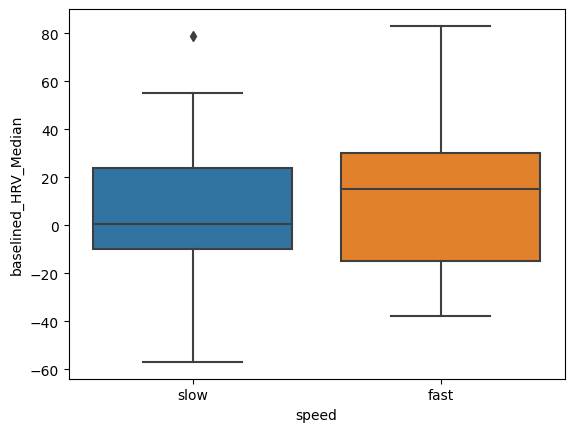

In [60]:
sns.boxplot(data = hrv_formatted, x = 'speed', y = 'baselined_HRV_Median')

<Axes: title={'center': 'Correlation (spearman) : 0.205, p : ns\nR² : 0.033, p : ns'}, xlabel='tempo', ylabel='baselined_HRV_Median'>

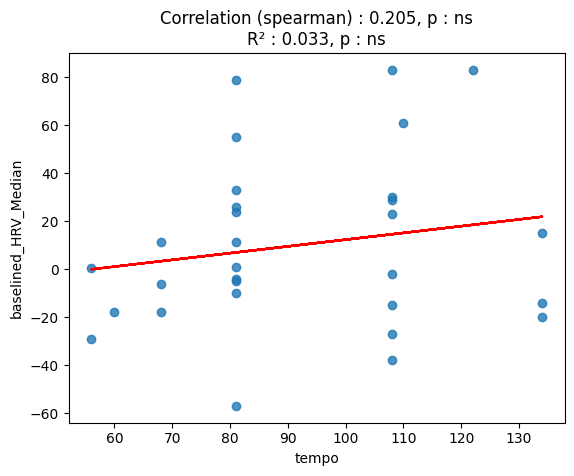

In [61]:
gh.stats_quantitative(df = hrv_formatted, xlabel = 'tempo', ylabel = 'baselined_HRV_Median')

In [62]:
load_formatted_data('psycho')

,participant,session,Relaxation_intensity,Arousal,tempo,speed,baseline_Relaxation_intensity,baselined_Relaxation_intensity,baseline_Arousal,baselined_Arousal
0,P01,music,61,24,81,slow,4,57,11,13
1,P02,music,91,35,81,slow,95,-4,7,28
2,P03,music,81,40,81,slow,65,16,33,7
3,P04,music,62,80,110,fast,71,-9,24,56
4,P05,music,93,89,108,fast,97,-4,10,79
5,P06,music,86,17,122,fast,66,20,9,8
6,P07,music,76,79,56,slow,69,7,11,68
7,P08,music,50,57,81,slow,50,0,14,43
8,P09,music,77,46,108,fast,53,24,31,15
9,P10,music,70,67,108,fast,29,41,4,63


In [63]:

# global_fontsize = 11
# letter_fontsize = 15

# letters = ['A)','B)','C)','D)','E)','F)']

# fig, axs = plt.subplots(nrows = 3, ncols = 2, figsize = (10,10), constrained_layout = True)
# ax = axs[0,0]
# gh.stats_quantitative(df = load_formatted_data('resp'), xlabel = 'tempo', ylabel = 'baselined_cycle_duration', ax=ax)
# ax.set_ylabel('Cycle Duration [sec]\n(Normalized against baseline)', fontsize = global_fontsize)
# ax = axs[0,1]
# gh.stats_quantitative(df = load_formatted_data('hrv'), xlabel = 'tempo', ylabel = 'baselined_HRV_Median', ax=ax)
# ax.set_ylabel('Median RRi [ms]\n(Normalized against baseline)', fontsize = global_fontsize)
# ax = axs[1,0]
# gh.stats_quantitative(df = load_formatted_data('hrv'), xlabel = 'tempo', ylabel = 'baselined_HRV_Mad', ax=ax)
# ax.set_ylabel('HRV MAD [ms]\n(Normalized against baseline)', fontsize = global_fontsize)
# ax = axs[1,1]
# gh.stats_quantitative(df = load_formatted_data('rsa'), xlabel = 'tempo', ylabel = 'baselined_decay_amplitude', ax=ax)
# ax.set_ylabel('RSA Amplitude [bpm]\n(Normalized against baseline)', fontsize = global_fontsize)
# ax = axs[2,0]
# gh.stats_quantitative(df = load_formatted_data('psycho'), xlabel = 'tempo', ylabel = 'baselined_Relaxation_intensity', ax=ax)
# ax.set_ylabel('Subjective relaxation\n(Normalized against baseline)', fontsize = global_fontsize)
# ax = axs[2,1]
# gh.stats_quantitative(df = load_formatted_data('psycho'), xlabel = 'tempo', ylabel = 'baselined_Arousal', ax=ax)
# ax.set_ylabel('Subjective arousal\n(Normalized against baseline)', fontsize = global_fontsize)

# for i, ax in enumerate(axs.flatten()):
#     ax.set_title(ax.get_title(), fontsize = global_fontsize)
#     ax.set_xlabel('Tempo [bpm]', fontsize = global_fontsize)
#     ax2 = ax.twinx()
#     xpos_letter = ax2.get_xlim()[0]
#     ypos_letter = ax2.get_ylim()[1]
#     ax2.text(x =  xpos_letter - xpos_letter / 10 , y = ypos_letter + ypos_letter / 20 , s = letters[i], fontsize = letter_fontsize)
#     ax2.axis('off')

# fig.savefig(save_folder / '6_quantiquanti_tempo_normalisés_par_baseline.png', dpi = 500, bbox_inches = 'tight')

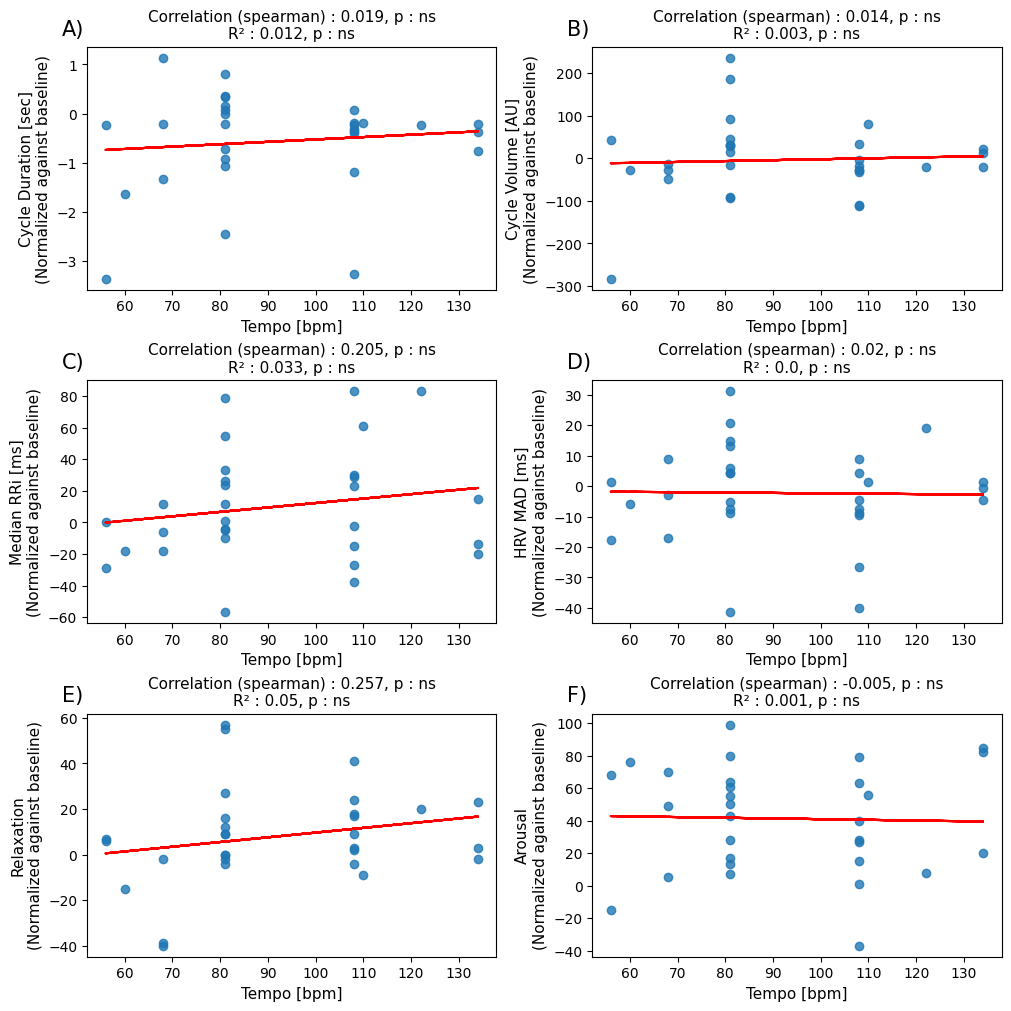

In [66]:

global_fontsize = 11
letter_fontsize = 15

letters = ['A)','B)','C)','D)','E)','F)']

fig, axs = plt.subplots(nrows = 3, ncols = 2, figsize = (10,10), constrained_layout = True)
ax = axs[0,0]
gh.stats_quantitative(df = load_formatted_data('resp'), xlabel = 'tempo', ylabel = 'baselined_cycle_duration', ax=ax)
ax.set_ylabel('Cycle Duration [sec]\n(Normalized against baseline)', fontsize = global_fontsize)
ax = axs[0,1]
gh.stats_quantitative(df = load_formatted_data('resp'), xlabel = 'tempo', ylabel = 'baselined_total_volume', ax=ax)
ax.set_ylabel('Cycle Volume [AU]\n(Normalized against baseline)', fontsize = global_fontsize)
ax = axs[1,0]
gh.stats_quantitative(df = load_formatted_data('hrv'), xlabel = 'tempo', ylabel = 'baselined_HRV_Median', ax=ax)
ax.set_ylabel('Median RRi [ms]\n(Normalized against baseline)', fontsize = global_fontsize)
ax = axs[1,1]
gh.stats_quantitative(df = load_formatted_data('hrv'), xlabel = 'tempo', ylabel = 'baselined_HRV_Mad', ax=ax)
ax.set_ylabel('HRV MAD [ms]\n(Normalized against baseline)', fontsize = global_fontsize)
ax = axs[2,0]
gh.stats_quantitative(df = load_formatted_data('psycho'), xlabel = 'tempo', ylabel = 'baselined_Relaxation_intensity', ax=ax)
ax.set_ylabel('Relaxation\n(Normalized against baseline)', fontsize = global_fontsize)
ax = axs[2,1]
gh.stats_quantitative(df = load_formatted_data('psycho'), xlabel = 'tempo', ylabel = 'baselined_Arousal', ax=ax)
ax.set_ylabel('Arousal\n(Normalized against baseline)', fontsize = global_fontsize)

for i, ax in enumerate(axs.flatten()):
    ax.set_title(ax.get_title(), fontsize = global_fontsize)
    ax.set_xlabel('Tempo [bpm]', fontsize = global_fontsize)
    ax2 = ax.twinx()
    xpos_letter = ax2.get_xlim()[0]
    ypos_letter = ax2.get_ylim()[1]
    ax2.text(x =  xpos_letter - xpos_letter / 10 , y = ypos_letter + ypos_letter / 20 , s = letters[i], fontsize = letter_fontsize)
    ax2.axis('off')

fig.savefig(save_folder / '6_quantiquanti_tempo_normalisés_par_baseline.png', dpi = 500, bbox_inches = 'tight')

In [51]:
# concat = []

# for res_type in ['resp','hrv','rsa','psycho']:
#     df = load_formatted_data(res_type)
#     df = df.set_index(['participant','tempo','speed','session'])
#     concat.append(df)
# df_tempo_lmm = pd.concat(concat, axis = 1).reset_index()

In [52]:
# df_tempo_lmm.to_excel(base_folder / 'Tables' / 'tempi.xlsx')

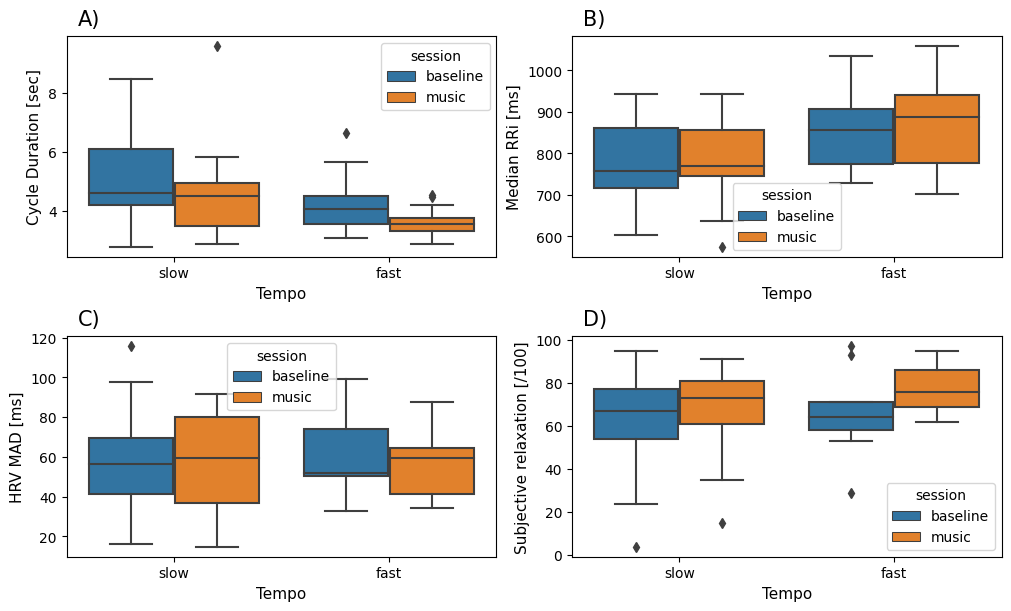

In [53]:

global_fontsize = 11
letter_fontsize = 15

letters = ['A)','B)','C)','D)']

fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (10,6), constrained_layout = True)
ax = axs[0,0]
sns.boxplot(data = load_formatted_data_2('resp'), x = 'speed', y = 'cycle_duration', hue = 'session', ax=ax)
ax.set_ylabel('Cycle Duration [sec]', fontsize = global_fontsize)
ax = axs[0,1]
sns.boxplot(data = load_formatted_data_2('hrv'), x = 'speed', y = 'HRV_Median', hue = 'session', ax=ax)
ax.set_ylabel('Median RRi [ms]', fontsize = global_fontsize)
ax = axs[1,0]
sns.boxplot(data = load_formatted_data_2('hrv'), x = 'speed', y = 'HRV_Mad', hue = 'session', ax=ax)
ax.set_ylabel('HRV MAD [ms]', fontsize = global_fontsize)
ax = axs[1,1]
sns.boxplot(data = load_formatted_data_2('psycho'), x = 'speed', y = 'Relaxation_intensity', hue = 'session', ax=ax)
ax.set_ylabel('Subjective relaxation [/100]', fontsize = global_fontsize)

for i, ax in enumerate(axs.flatten()):
    ax.set_title(ax.get_title(), fontsize = global_fontsize)
    ax.set_xlabel('Tempo', fontsize = global_fontsize)
    ax2 = ax.twinx()
    xpos_letter = ax2.get_xlim()[0]
    ypos_letter = ax2.get_ylim()[1]
    ax2.text(x =  xpos_letter - xpos_letter / 10 , y = ypos_letter + ypos_letter / 20 , s = letters[i], fontsize = letter_fontsize)
    ax2.axis('off')

fig.savefig(save_folder / '4_boxplots_tempo_baseline.png', dpi = 500, bbox_inches = 'tight')

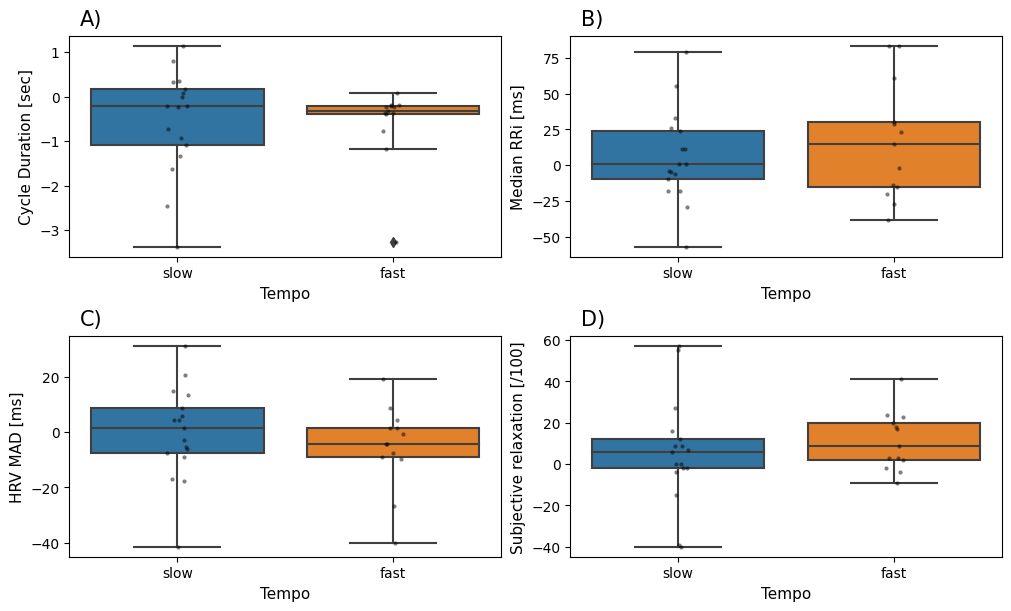

In [54]:

global_fontsize = 11
letter_fontsize = 15

letters = ['A)','B)','C)','D)']

fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (10,6), constrained_layout = True)
ax = axs[0,0]
sns.boxplot(data = load_formatted_data('resp'), x = 'speed', y = 'baselined_cycle_duration', ax=ax, whis = 10)
sns.stripplot(x='speed', y='baselined_cycle_duration', data=load_formatted_data('resp'), color = 'k', alpha = 0.5, size = 3, jitter = 0.05, ax=ax)
ax.set_ylabel('Cycle Duration [sec]', fontsize = global_fontsize)
ax = axs[0,1]
sns.boxplot(data = load_formatted_data('hrv'), x = 'speed', y = 'baselined_HRV_Median', ax=ax, whis = 10)
sns.stripplot(data = load_formatted_data('hrv'), x = 'speed', y = 'baselined_HRV_Median', color = 'k', alpha = 0.5, size = 3, jitter = 0.05, ax=ax)
ax.set_ylabel('Median RRi [ms]', fontsize = global_fontsize)
ax = axs[1,0]
sns.boxplot(data = load_formatted_data('hrv'), x = 'speed', y = 'baselined_HRV_Mad', ax=ax, whis = 10)
sns.stripplot(data = load_formatted_data('hrv'), x = 'speed', y = 'baselined_HRV_Mad', color = 'k', alpha = 0.5, size = 3, jitter = 0.05, ax=ax)
ax.set_ylabel('HRV MAD [ms]', fontsize = global_fontsize)
ax = axs[1,1]
sns.boxplot(data = load_formatted_data('psycho'), x = 'speed', y = 'baselined_Relaxation_intensity', ax=ax, whis = 10)
sns.stripplot(data = load_formatted_data('psycho'), x = 'speed', y = 'baselined_Relaxation_intensity', color = 'k', alpha = 0.5, size = 3, jitter = 0.05, ax=ax)
ax.set_ylabel('Subjective relaxation [/100]', fontsize = global_fontsize)

for i, ax in enumerate(axs.flatten()):
    ax.set_title(ax.get_title(), fontsize = global_fontsize)
    ax.set_xlabel('Tempo', fontsize = global_fontsize)
    ax2 = ax.twinx()
    xpos_letter = ax2.get_xlim()[0]
    ypos_letter = ax2.get_ylim()[1]
    ax2.text(x =  xpos_letter - xpos_letter / 10 , y = ypos_letter + ypos_letter / 20 , s = letters[i], fontsize = letter_fontsize)
    ax2.axis('off')

fig.savefig(save_folder / '4_boxplots_tempo_normalisés_par_baseline.png', dpi = 500, bbox_inches = 'tight')